LOAD AND INSPECT THE DATA

In [2]:
import pandas as pd

In [9]:
!pip install openpyxl


   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [3]:
df = pd.read_excel("C:/Users/Fridah/Documents/ariddata.xlsx")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   County         47 non-null     object 
 1   physical       47 non-null     float64
 2   Sexual         47 non-null     float64
 3   Intimate       0 non-null      float64
 4   ipc 3+         23 non-null     float64
 5   Drought level  47 non-null     object 
 6   Category       47 non-null     object 
dtypes: float64(4), object(3)
memory usage: 2.7+ KB


In [34]:
df.head(10)

,County,physical,Sexual,Intimate,ipc 3+,Drought level,Category,drought_code,asal_code
0,Baringo,19.6,5.7,NaN,0.40,Normal Phase,Asal,0,0
1,Bomet,10.7,7.4,NaN,NaN,Normal Phase,None Asal,0,1
2,Bungoma,29.4,16.6,NaN,NaN,Normal Phase,None Asal,0,1
3,Busia,21.1,8.9,NaN,NaN,Normal Phase,None Asal,0,1
4,Elgeyo-Marakwet,15.9,4.0,NaN,NaN,Normal Phase,None Asal,0,1
5,Embu,27.7,13.0,NaN,0.15,Normal Phase,Asal,0,0
6,Garissa,12.8,3.5,NaN,0.45,Alarm Phase,Asal,2,0
7,Homa Bay,26.6,10.8,NaN,NaN,Normal Phase,None Asal,0,1
8,Isiolo,29.3,5.3,NaN,0.50,Alarm Phase,Asal,2,0
9,Kajiado,17.0,8.6,NaN,0.05,Alarm Phase,Asal,2,0


In [9]:
# Encode drought levels
drought_map={'Normal Phase':0,'Alert Phase':1,'Alarm Phase':2}
df['drought_code']=df['Drought level'].map(drought_map)

In [10]:
df[['Drought level','drought_code']].head(10)

,Drought level,drought_code
0,Normal Phase,0
1,Normal Phase,0
2,Normal Phase,0
3,Normal Phase,0
4,Normal Phase,0
5,Normal Phase,0
6,Alarm Phase,2
7,Normal Phase,0
8,Alarm Phase,2
9,Alarm Phase,2


ENCODE VARIABLES

In [19]:
# Encode ASAL
asal_map={'Asal':0,'None Asal':1}
df['asal_code']=df['Category'].map(asal_map)

In [12]:
df[['Category','asal_code']].head(10)

,Category,asal_code
0,Asal,0
1,None Asal,1
2,None Asal,1
3,None Asal,1
4,None Asal,1
5,Asal,0
6,Asal,0
7,None Asal,1
8,Asal,0
9,Asal,0


In [21]:
# ipc only exists for ASAL counties
asal_df=df[df['asal_code']==0].copy()

In [22]:
asal_df['Category'].value_counts()

Category
Asal    23
Name: count, dtype: int64

DESCRIPTIVE ANALYSIS

In [24]:
df.groupby('Drought level')['physical'].mean()

Drought level
Alarm Phase     14.261538
Alert Phase     13.757143
Normal Phase    17.277778
Name: physical, dtype: float64

In [26]:
df.groupby('Category')['physical'].mean()

Category
Asal         15.134783
None Asal    16.670833
Name: physical, dtype: float64

In [46]:
# Correlation between ipc & physical violence
asal_df[['ipc 3+','physical']].corr()

,ipc 3+,physical
ipc 3+,1.000000,0.174824
physical,0.174824,1.000000


In [ ]:
from scipy.stats import pearsonr

In [47]:
r,p = pearsonr(asal_df['ipc 3+'],
               asal_df['physical'])
r,p

(np.float64(0.17482394830602854), np.float64(0.42496158340954077))

VISUALIZATION

In [27]:
import matplotlib.pyplot as plt

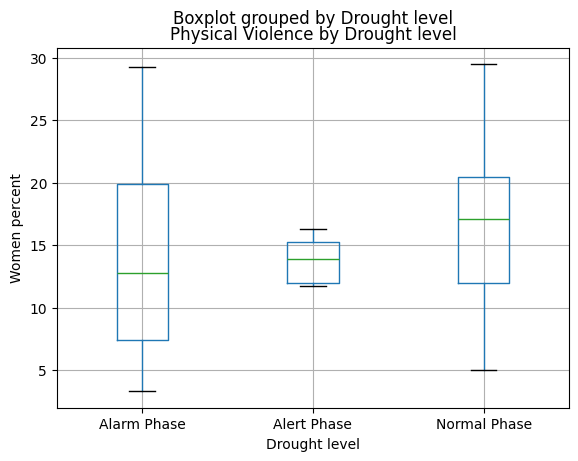

In [44]:
# Create a box plot
df.boxplot(column='physical',by='Drought level')
plt.title('Physical Violence by Drought level')
plt.xlabel('Drought level')
plt.ylabel('Women percent')
plt.savefig('box plot drought.png', dpi=300)
plt.show()

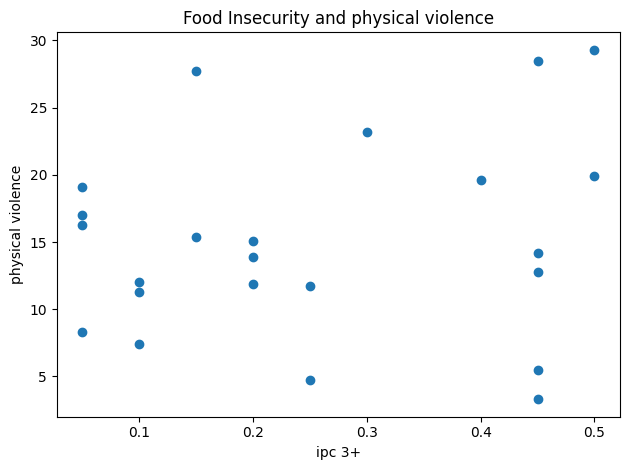

In [43]:
# Create Scatter plot
plt.scatter(asal_df['ipc 3+'],asal_df['physical'])
plt.title('Food Insecurity and physical violence')
plt.xlabel('ipc 3+')
plt.ylabel('physical violence')
plt.tight_layout()
plt.savefig('scatter food insecurity.png', dpi=300)
plt.show()

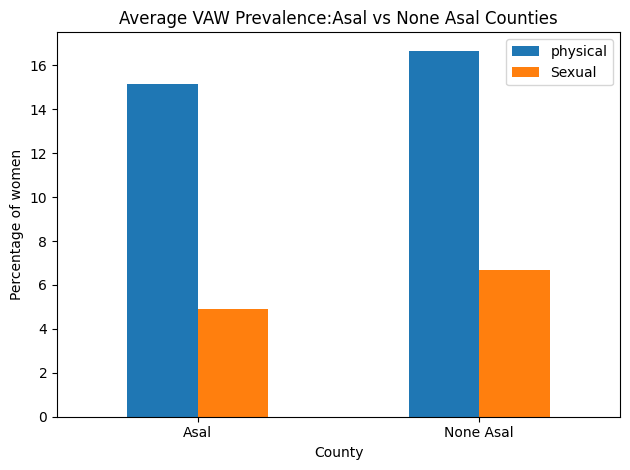

In [42]:
# Create the bar chart
asal_compare = df.groupby('Category')[['physical','Sexual']].mean()
asal_compare.plot(kind='bar')
plt.title('Average VAW Prevalence:Asal vs None Asal Counties')
plt.xlabel('County')
plt.ylabel('Percentage of women')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig('bar Average VAW ,Counties.png', dpi=300)
plt.show()

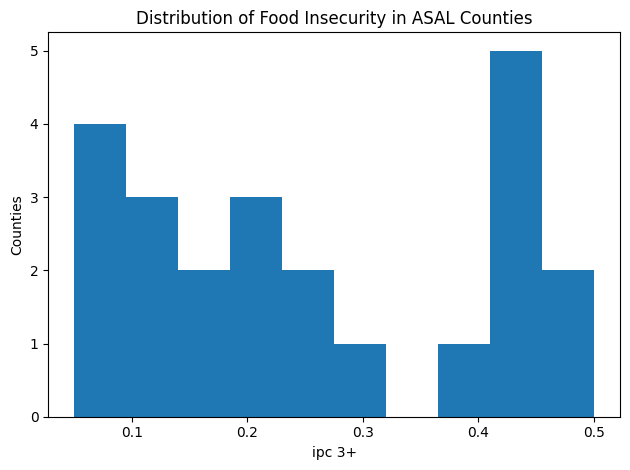

In [45]:
# Create a histogram
plt.hist(asal_df['ipc 3+'].dropna(), bins=10)
plt.title('Distribution of Food Insecurity in ASAL Counties')
plt.xlabel('ipc 3+')
plt.ylabel('Counties')
plt.tight_layout()
plt.savefig('histogram food insecurity.png', dpi=300)
plt.show()